plan
1    1985
2    2978
3    4368
4    5559
5    2978
6    1389
7     595
dtype: int64
Start Model Analysis...

------------------------------------------------------------
Models                             : Accuracy       Std       
------------------------------------------------------------
Logistic Regression                : 72.609224      0.95226   
Linear Discriminant Analysis       : 72.39538       0.882643  
K-Nearest Neighbour Classifier     : 82.753406      0.8917    
Decision Tree Classifier           : 89.83011       0.830079  
Gaussian Naive Bayes Classifier    : 86.065312      0.602207  
Support Vector Machine             : 41.175013      0.525615  
------------------------------------------------------------

Completed Model Analysis...


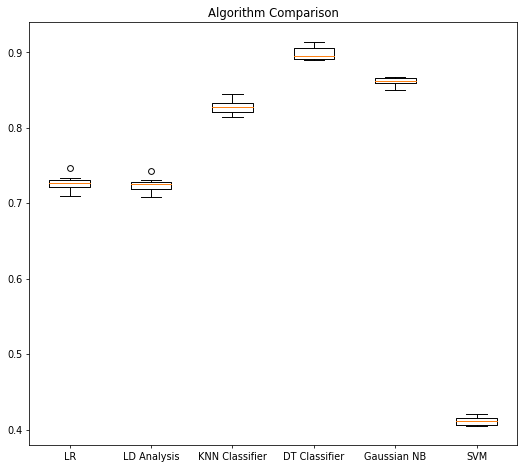

0.8851674641148325
[[365  47   0   0   0   0   0]
 [ 26 592   1   0   0   0   0]
 [  0   0 748 121   0   0   0]
 [  0   0  97 959  66   1   0]
 [  0   0   0  52 494   5   0]
 [  0   0   0   1  11 249  16]
 [  0   0   0   0   0  12 108]]
              precision    recall  f1-score   support

           1       0.93      0.89      0.91       412
           2       0.93      0.96      0.94       619
           3       0.88      0.86      0.87       869
           4       0.85      0.85      0.85      1123
           5       0.87      0.90      0.88       551
           6       0.93      0.90      0.92       277
           7       0.87      0.90      0.89       120

    accuracy                           0.89      3971
   macro avg       0.89      0.89      0.89      3971
weighted avg       0.89      0.89      0.89      3971



In [2]:
import numpy as np
import pandas as pd

from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import KBinsDiscretizer
from matplotlib.pyplot import figure

# Read CSV file and import the data as DataFrame
filename = "C:\\Work\\Workspace\\Project\\record_second.csv"
names = ['name', 'address', 'phoneNumber', 'region','age', 'callCount', 'activeCallTime', 
         'smsCount', 'dataUsage', 'Subscription_1', 'Subscription_2', 
         'Subscription_3', 'Subscription_4', 'plan']
dataset = pd.read_csv(filename, names=names)

# The below values are scrapped since they do not contribute to the prediction
dataset.pop('name')
dataset.pop('address')
dataset.pop('phoneNumber')

#print(dataset.describe())
print(dataset.groupby('plan').size())

def descritize(column_name, num_of_bins):
    data = dataset[column_name].values
    df = pd.DataFrame(data,columns=[column_name])
    trans = KBinsDiscretizer(n_bins=num_of_bins, encode='ordinal', strategy='uniform')
    data = trans.fit_transform(df)
    return pd.DataFrame(data)
        
        
# To convert the string to number. Here city names are converted to integer.
le = LabelEncoder()
for col in dataset.columns:
    
    if col == 'region':
        dataset[col] = LabelEncoder().fit_transform(dataset[col])

array = dataset.values
X = array[:,0:9]
y = array[:,10]

X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)
# Spot Check Algorithms
models = []
models.append(('LR', 'Logistic Regression', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LD Analysis', 'Linear Discriminant Analysis', LinearDiscriminantAnalysis()))
models.append(('KNN Classifier', 'K-Nearest Neighbour Classifier', KNeighborsClassifier()))
models.append(('DT Classifier', 'Decision Tree Classifier', DecisionTreeClassifier()))
models.append(('Gaussian NB', 'Gaussian Naive Bayes Classifier', GaussianNB()))
models.append(('SVM', 'Support Vector Machine', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
print("Start Model Analysis...")
print()
print('-'*60)
print ('{:<35}{:<2}{:<15}{:<10}'.format("Models", ':', 'Accuracy', 'Std'))
print('-'*60)
for short_name, name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(short_name)
	print ('{:<35}{:<2}{:<15}{:<10}'.format(name, ':', round((cv_results.mean()*100),6), round((cv_results.std()*100), 6)))
	#print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
print('-'*60)
print()
print("Completed Model Analysis...")

# Compare Algorithms
figure(num=None, figsize=(9, 8), dpi=70, facecolor='w', edgecolor='k')
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))
